In [20]:
import torch
import torchvision

from torchvision import (
    transforms,
    datasets
)

In [21]:
train = datasets.MNIST("data", train=True, download=True,
                       transform=transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("data", train=False, download=True,
                       transform=transforms.Compose([transforms.ToTensor()]))

In [22]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False)

In [23]:
import torch.nn as nn
import torch.nn.functional as F

In [24]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 64) # 28*28 Image
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10) # 10 possible digits or 10 classes
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        output = F.log_softmax(
            self.fc4(x),
            dim=1
        )
        return output
        

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [25]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)

EPOCHS=3

for epoch in range(EPOCHS):
    for data in trainset:
        # data is a batch of featuresets and labels
        X, y = data
        net.zero_grad() # Zero the Gradients
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)

tensor(0.0317, grad_fn=<NllLossBackward>)
tensor(0.0070, grad_fn=<NllLossBackward>)
tensor(0.1933, grad_fn=<NllLossBackward>)


In [31]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X, y = data
        output = net(X.view(-1, 28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

print("Accuracy: ", round(correct/total, 3))

X

Accuracy:  0.979


tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

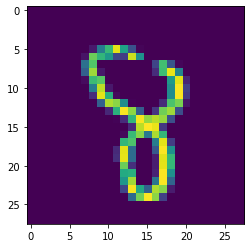

In [35]:
import matplotlib.pyplot as plt

plt.imshow(X[0].view(28, 28))
plt.show()

In [42]:
print(torch.argmax(net(X[0].view(-1, 784))[0]))

tensor(8)


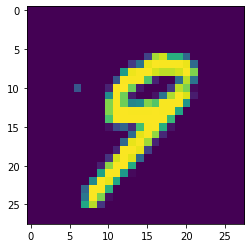

In [43]:
plt.imshow(X[4].view(28, 28))
plt.show()

In [44]:
print(torch.argmax(net(X[4].view(-1, 784))[0]))

tensor(9)
